In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import normaltest

In [2]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# "Malgun Gothic"
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

In [3]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

C:\Users\jihye\AppData\Local\Temp\ipykernel_7208\2409215588.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [59]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Windows\\Fonts\\sylfaen.ttf',
 'C:\\Windows\\Fonts\\CALIST.TTF',
 'C:\\Windows\\Fonts\\BSSYM7.TTF',
 'C:\\Windows\\Fonts\\CALIFB.TTF',
 'C:\\Windows\\Fonts\\GOUDOSB.TTF',
 'C:\\Windows\\Fonts\\YuGothL.ttc',
 'C:\\Windows\\Fonts\\calibrii.ttf',
 'C:\\Windows\\Fonts\\FRADM.TTF',
 'C:\\Windows\\Fonts\\PAPYRUS.TTF',
 'C:\\Windows\\Fonts\\GLSNECB.TTF',
 'C:\\Windows\\Fonts\\TCCM____.TTF',
 'C:\\Windows\\Fonts\\SCHLBKB.TTF',
 'C:\\Windows\\Fonts\\MATURASC.TTF',
 'C:\\Windows\\Fonts\\gadugi.ttf',
 'C:\\Windows\\Fonts\\SCRIPTBL.TTF',
 'C:\\Windows\\Fonts\\arial.ttf',
 'C:\\Windows\\Fonts\\H2GTRM.TTF',
 'C:\\Windows\\Fonts\\segoepr.ttf',
 'C:\\Windows\\Fonts\\CENTAUR.TTF',
 'C:\\Windows\\Fonts\\GOUDOSI.TTF',
 'C:\\Windows\\Fonts\\MTEXTRA.TTF',
 'C:\\Windows\\Fonts\\GARAIT.TTF',
 'C:\\Windows\\Fonts\\PRISTINA.TTF',
 'C:\\Windows\\Fonts\\NIAGSOL.TTF',
 'C:\\Windows\\Fonts\\GARA.TTF',
 'C:\\Windows\\Fonts\\segoeuii.ttf',
 'C:\\Windows\\Fonts\\ROCC____.TTF',
 'C:\\Users\\jihye\\AppData\\Local

In [60]:
a = fm.FontProperties(fname=font_list[0])
a.get_name()

'Sylfaen'

In [70]:
fm.get_fontconfig_fonts()
font_location = 'C:\\Windows\\Fonts\\sylfaen.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family='Sylfaen')

In [71]:
# 경고 메세지 없애기

import warnings 

warnings.filterwarnings(action='ignore')

In [72]:
df = pd.read_csv("./data/Video_Games.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Unnamed: 10,Unnamed: 11,User_Score,User_Count
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,NaN,NaN,8,322.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,NaN,NaN,8.3,709.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,NaN,NaN,8,192.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  object 
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      0 non-null      float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
dtypes: float64(8), object(6)
memory usage: 1.8+ MB


In [74]:
# 결측치가 있는지 확인한다.

df.isnull().sum()

Name                   2
Platform               0
Year_of_Release      269
Genre                  2
Publisher             54
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           2
Unnamed: 10        16719
Unnamed: 11        16719
User_Score          6704
User_Count          9129
dtype: int64

In [75]:
df = df[(df['Year_of_Release'] != 2020) & (df['Year_of_Release'] != 2017)]
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Unnamed: 10,Unnamed: 11,User_Score,User_Count
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,NaN,NaN,8,322.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,NaN,NaN,8.3,709.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,NaN,NaN,8,192.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16719 entries, 0 to 16718
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  object 
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      0 non-null      float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
dtypes: float64(8), object(6)
memory usage: 1.9+ MB


In [77]:
df_genre_year = df.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().unstack()
df_genre_year = df_genre_year.fillna(0)
df_genre_year = df_genre_year.reset_index()
#df_genre_year = df_genre_year.stack()
df_genre_year.head()

Genre,Year_of_Release,Action,Adventure,Fighting,Idea Factory,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sony Computer Entertainment,Sports,Strategy
0,1980,0.34,0.0,0.77,0.0,2.71,0.00,0.00,0.00,0.0,7.07,0.00,0.0,0.49,0.0
1,1981,14.84,0.0,0.00,0.0,0.00,6.93,2.24,0.48,0.0,10.04,0.45,0.0,0.79,0.0
2,1982,6.52,0.0,0.00,0.0,0.87,5.03,10.03,1.57,0.0,3.79,0.00,0.0,1.05,0.0
3,1983,2.86,0.4,0.00,0.0,2.14,6.93,0.78,0.00,0.0,0.48,0.00,0.0,3.20,0.0
4,1984,1.85,0.0,0.00,0.0,1.45,0.69,3.14,5.95,0.0,31.10,0.00,0.0,6.18,0.0


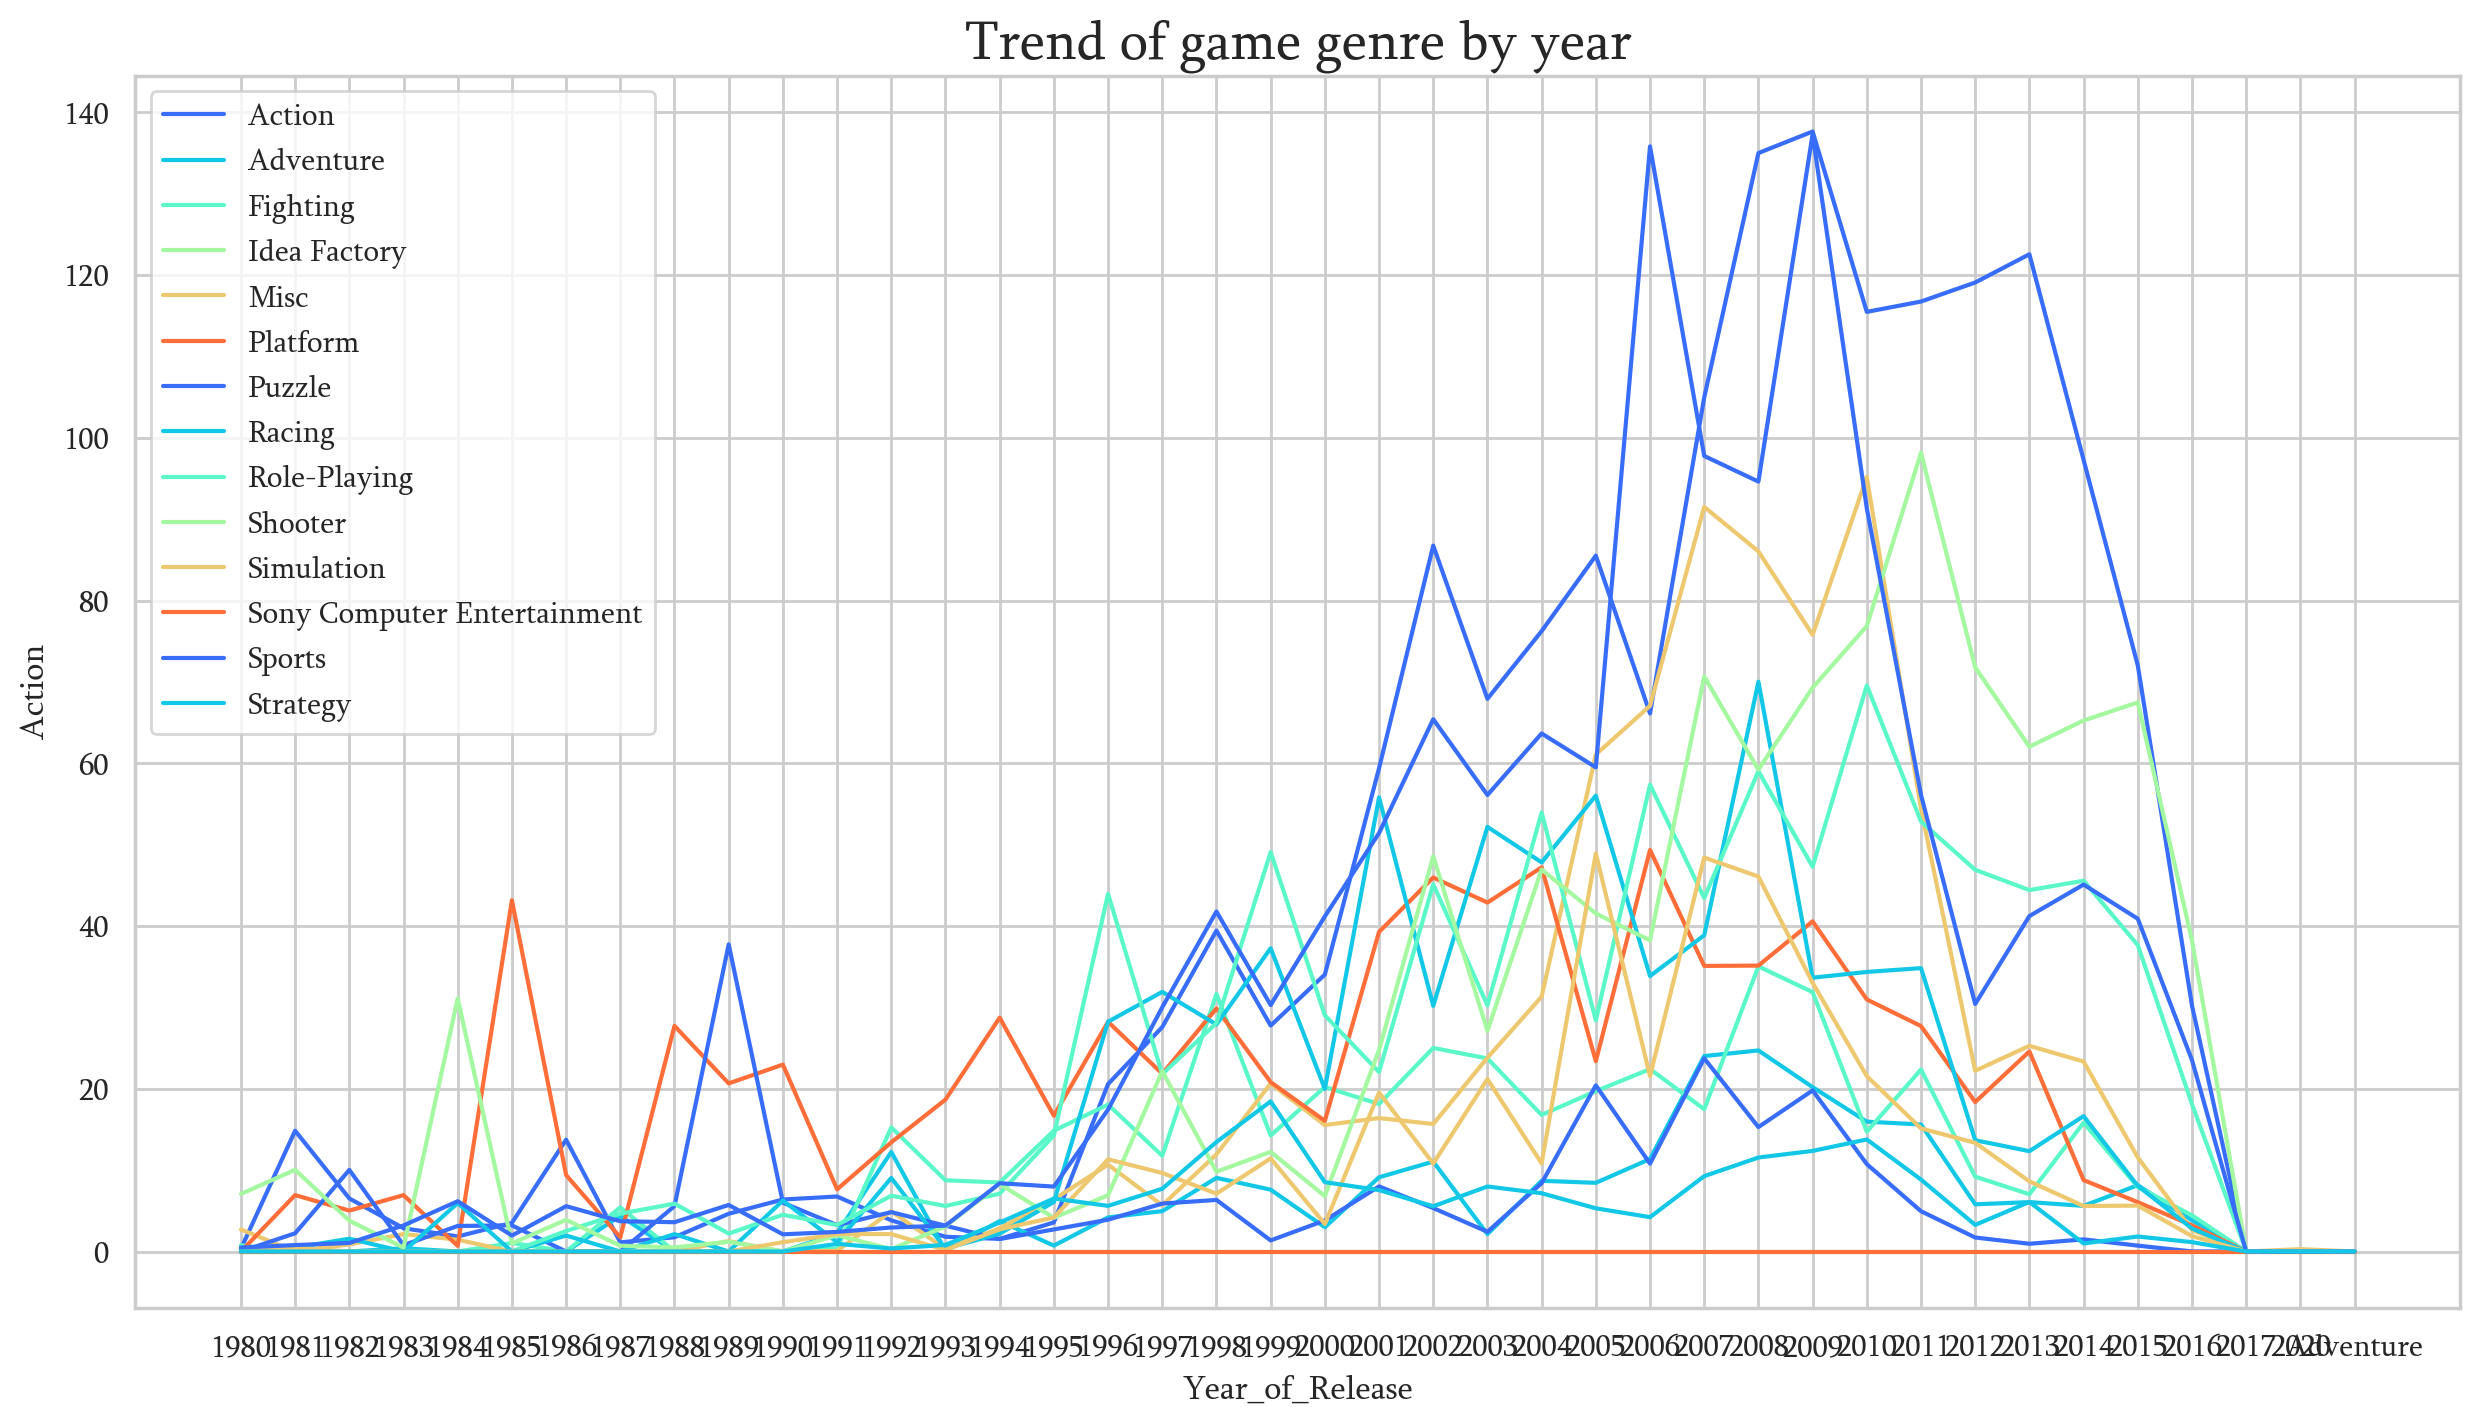

In [89]:
sns.set_palette('rainbow')
color = ['']
plt.figure(figsize=(15, 8))
plt.title('Trend of game genre by year', fontsize=20)
genre = df_genre_year.columns
for i in range(1, len(genre)):
    sns.lineplot(data=df_genre_year, x='Year_of_Release', y=genre[i], label=genre[i])

연도에 따른 장르별 판매량 (scatterplot)

<AxesSubplot: xlabel='Year_of_Release', ylabel='Global_Sales'>

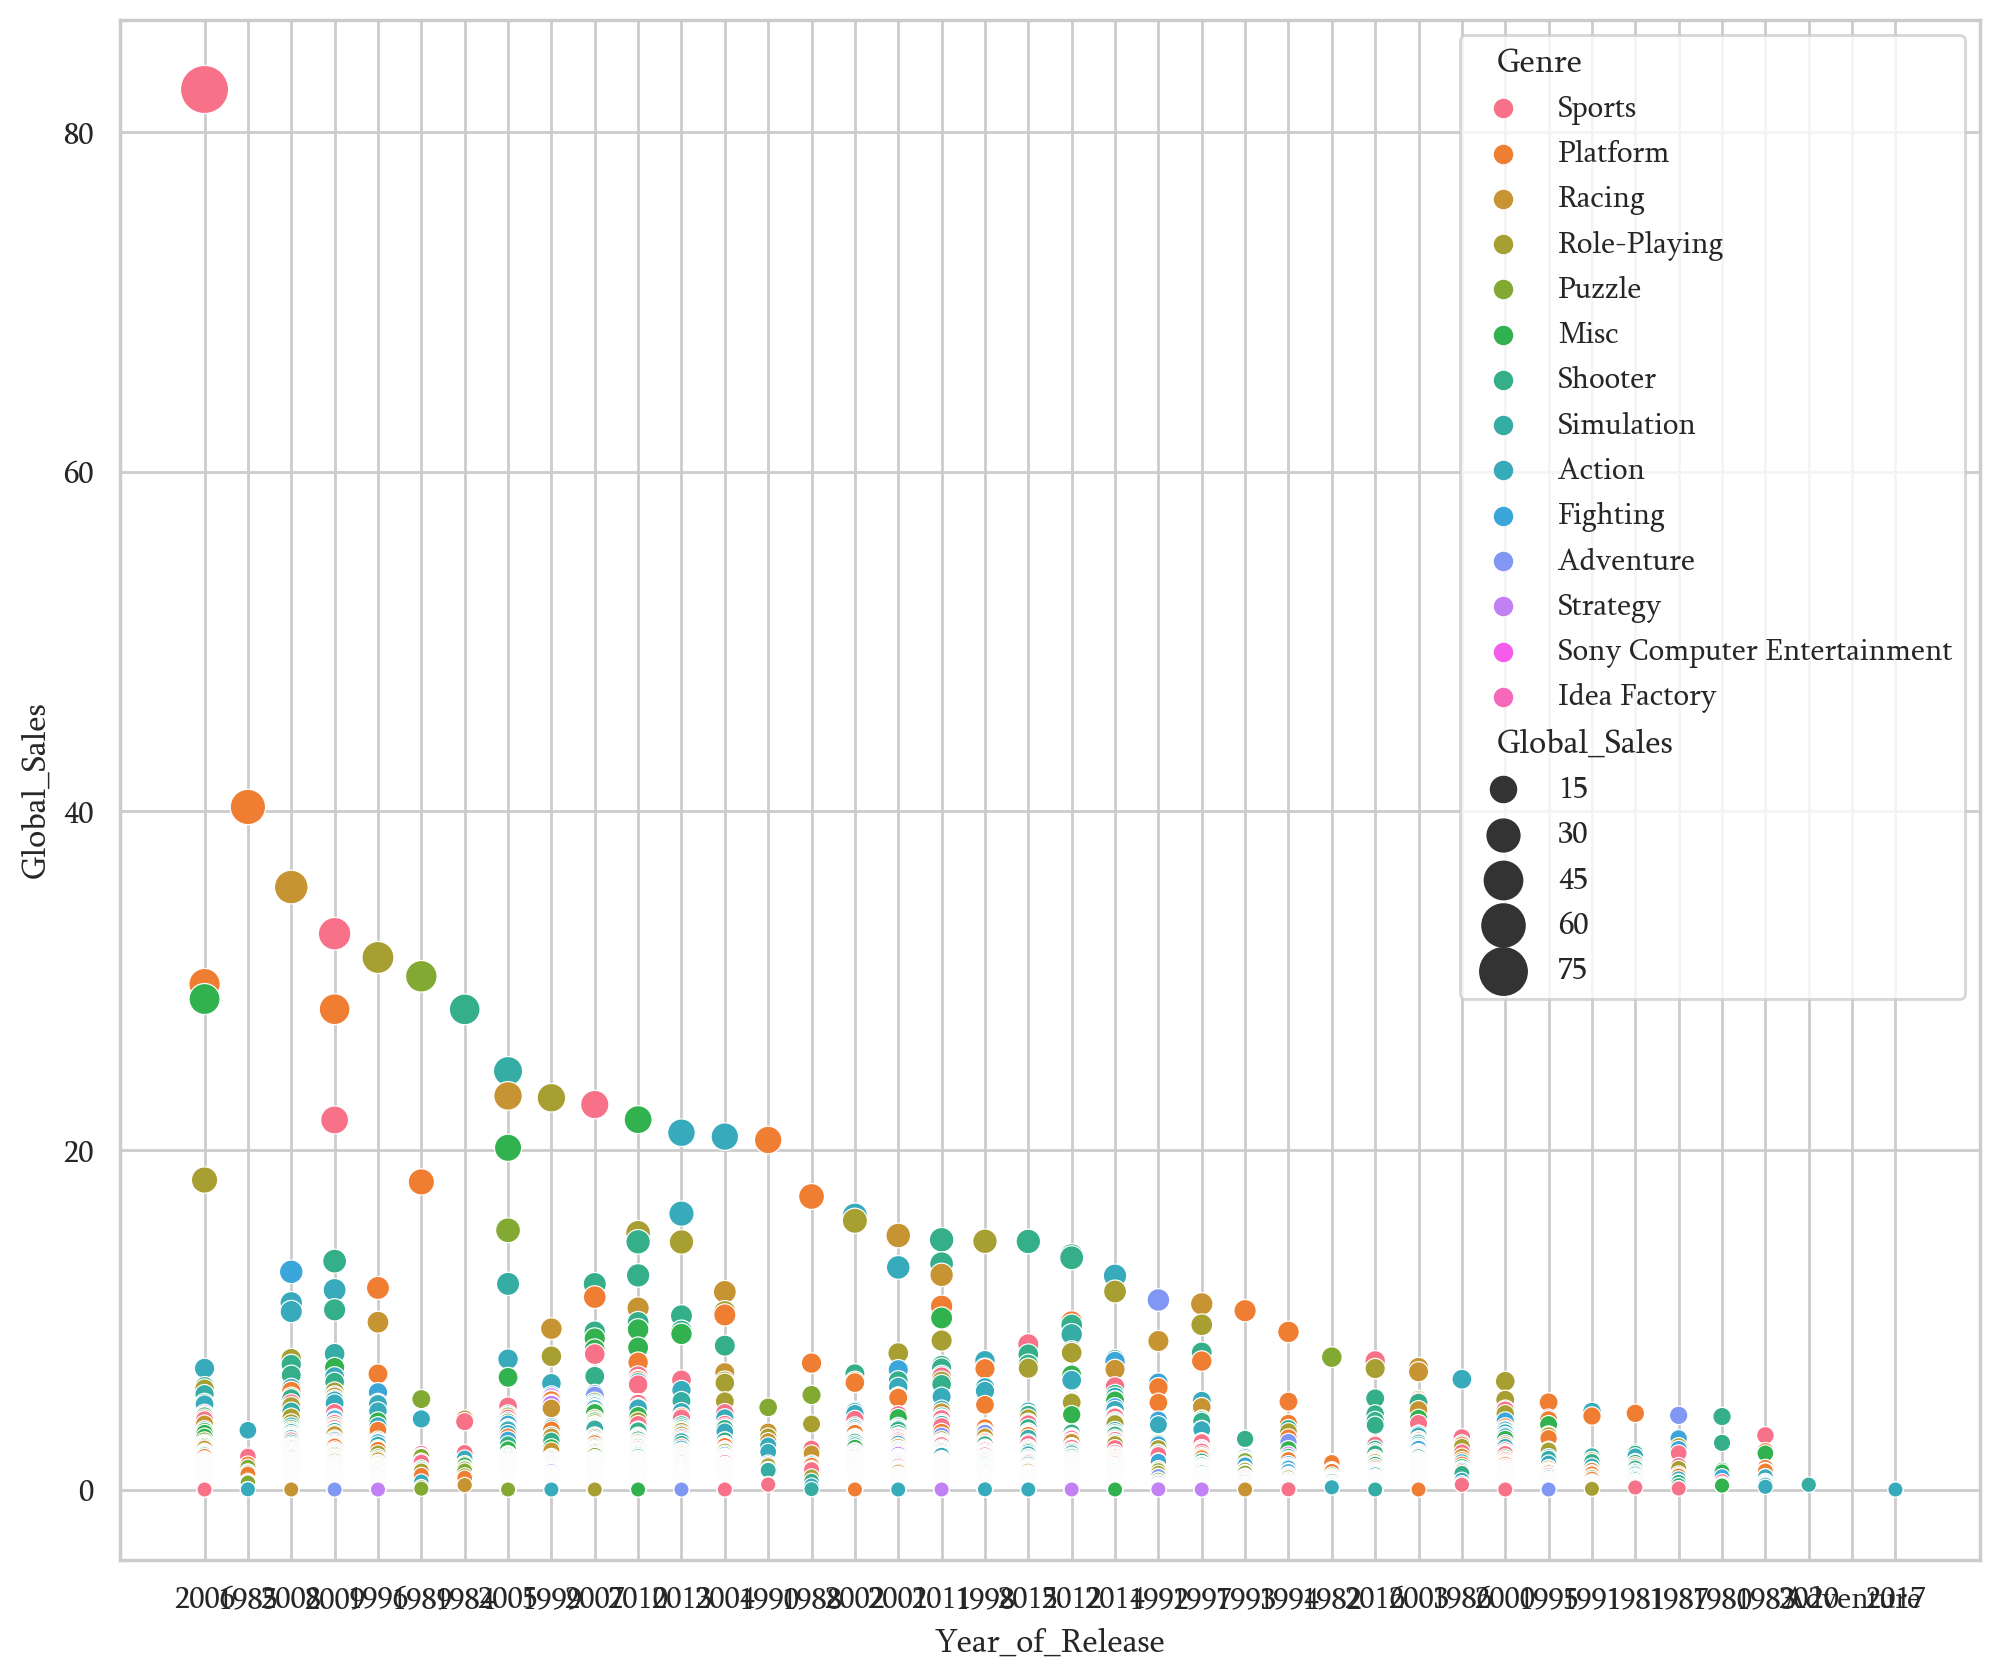

In [79]:
# 연도에 따른 장르 (스캐터)

plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x="Year_of_Release", y="Global_Sales", 
                hue="Genre", size="Global_Sales", sizes=(30, 300))

In [80]:
# 연도에 따른 각 지역별 출고량을 위한 전처리

df_year_region = df.groupby(['Year_of_Release'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum().stack()
df_year_region = df_year_region.reset_index()
df_year_region.rename(columns = {'level_1' : 'Region'}, inplace = True)
df_year_region.rename(columns = {0 : 'Sales'}, inplace = True)
df_year_region.head()

,Year_of_Release,Region,Sales
0,1980,NA_Sales,10.59
1,1980,EU_Sales,0.67
2,1980,JP_Sales,0.00
3,1980,Other_Sales,0.12
4,1980,Global_Sales,11.38


Text(0.5, 1.0, 'Sales by region by year')

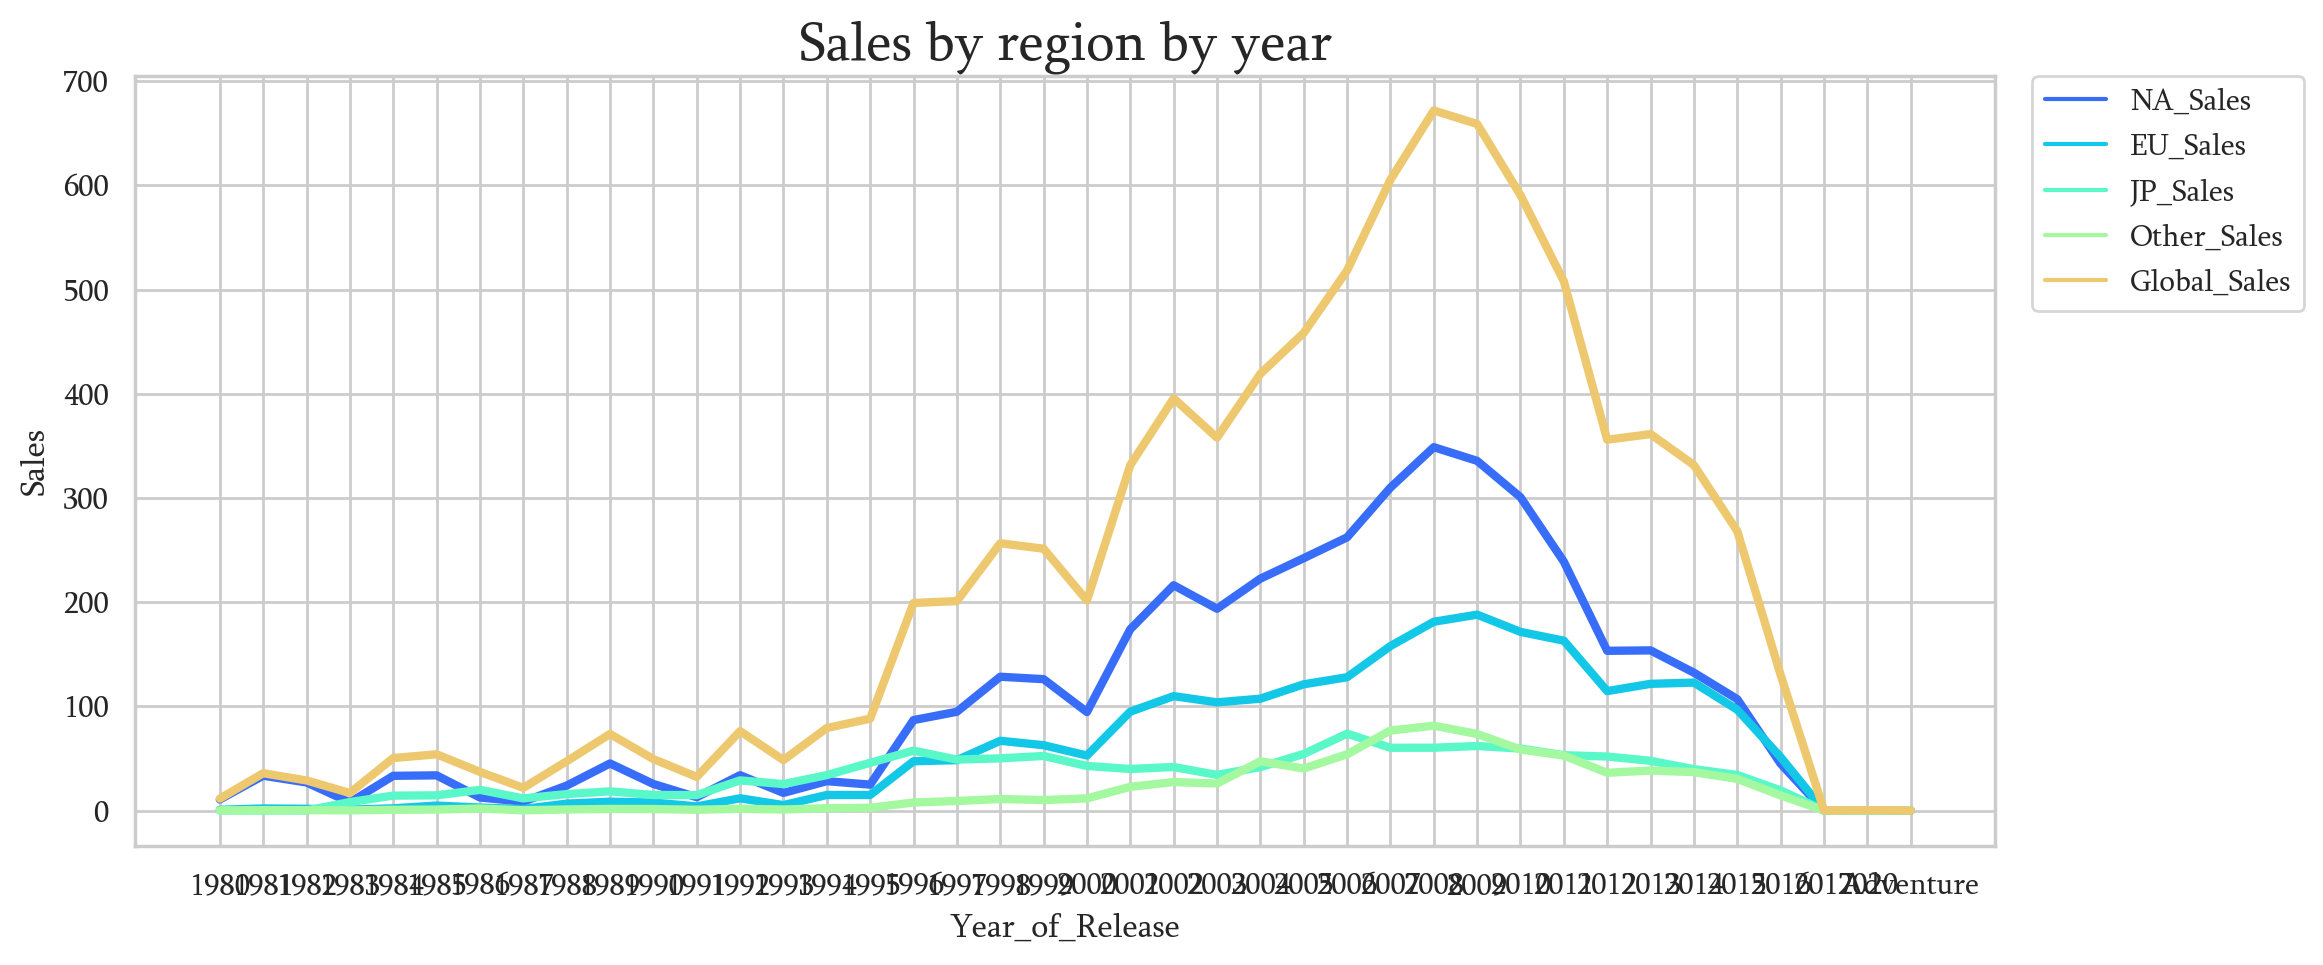

In [88]:
# 연도에 따른 지역별 출고량 그래프 그리기
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_year_region, x="Year_of_Release", y="Sales", hue="Region", linewidth=3)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Sales by region by year', fontsize=20)

In [84]:
# 연도별 top10 플랫폼 트렌드
# 연도에 따른 각 플랫폼별 판매량.

df_year_platform = df.groupby(['Year_of_Release', 'Platform'])['Global_Sales'].sum()
df_year_platform = df_year_platform.reset_index()
df_year_platform.head()

,Year_of_Release,Platform,Global_Sales
0,1980,2600,11.38
1,1981,2600,35.77
2,1982,2600,28.86
3,1983,2600,5.83
4,1983,NES,10.96


In [101]:
# 판매량이 가장 높은 10개의 플랫폼 리스트 만들기.

df_platform = df_year_platform.groupby('Platform')['Global_Sales'].sum().to_frame()
df_platform = df_platform.sort_values(by='Global_Sales', ascending=False).head(10)
df_platform = df_platform.reset_index()
platform_list = df_platform['Platform'].array

# 판매량이 가장 높은 10개의 플랫폼의 정보를 df_platform_top10에 담기.
df_platform_top10 = pd.DataFrame()

for i in range(len(platform_list)):
    df_p = df_year_platform[df_year_platform['Platform']==platform_list[i]]
    df_platform_top10 = df_platform_top10.append(df_p)
    
df_platform_top10.head(10)

,Year_of_Release,Platform,Global_Sales
94,2000,PS2,39.11
104,2001,PS2,166.43
113,2002,PS2,205.40
119,2003,PS2,184.29
125,2004,PS2,211.78
132,2005,PS2,160.65
140,2006,PS2,103.42
151,2007,PS2,76.00
160,2008,PS2,53.83
168,2009,PS2,26.45


Text(0.5, 1.0, 'Sales by TOP10 platform by year')

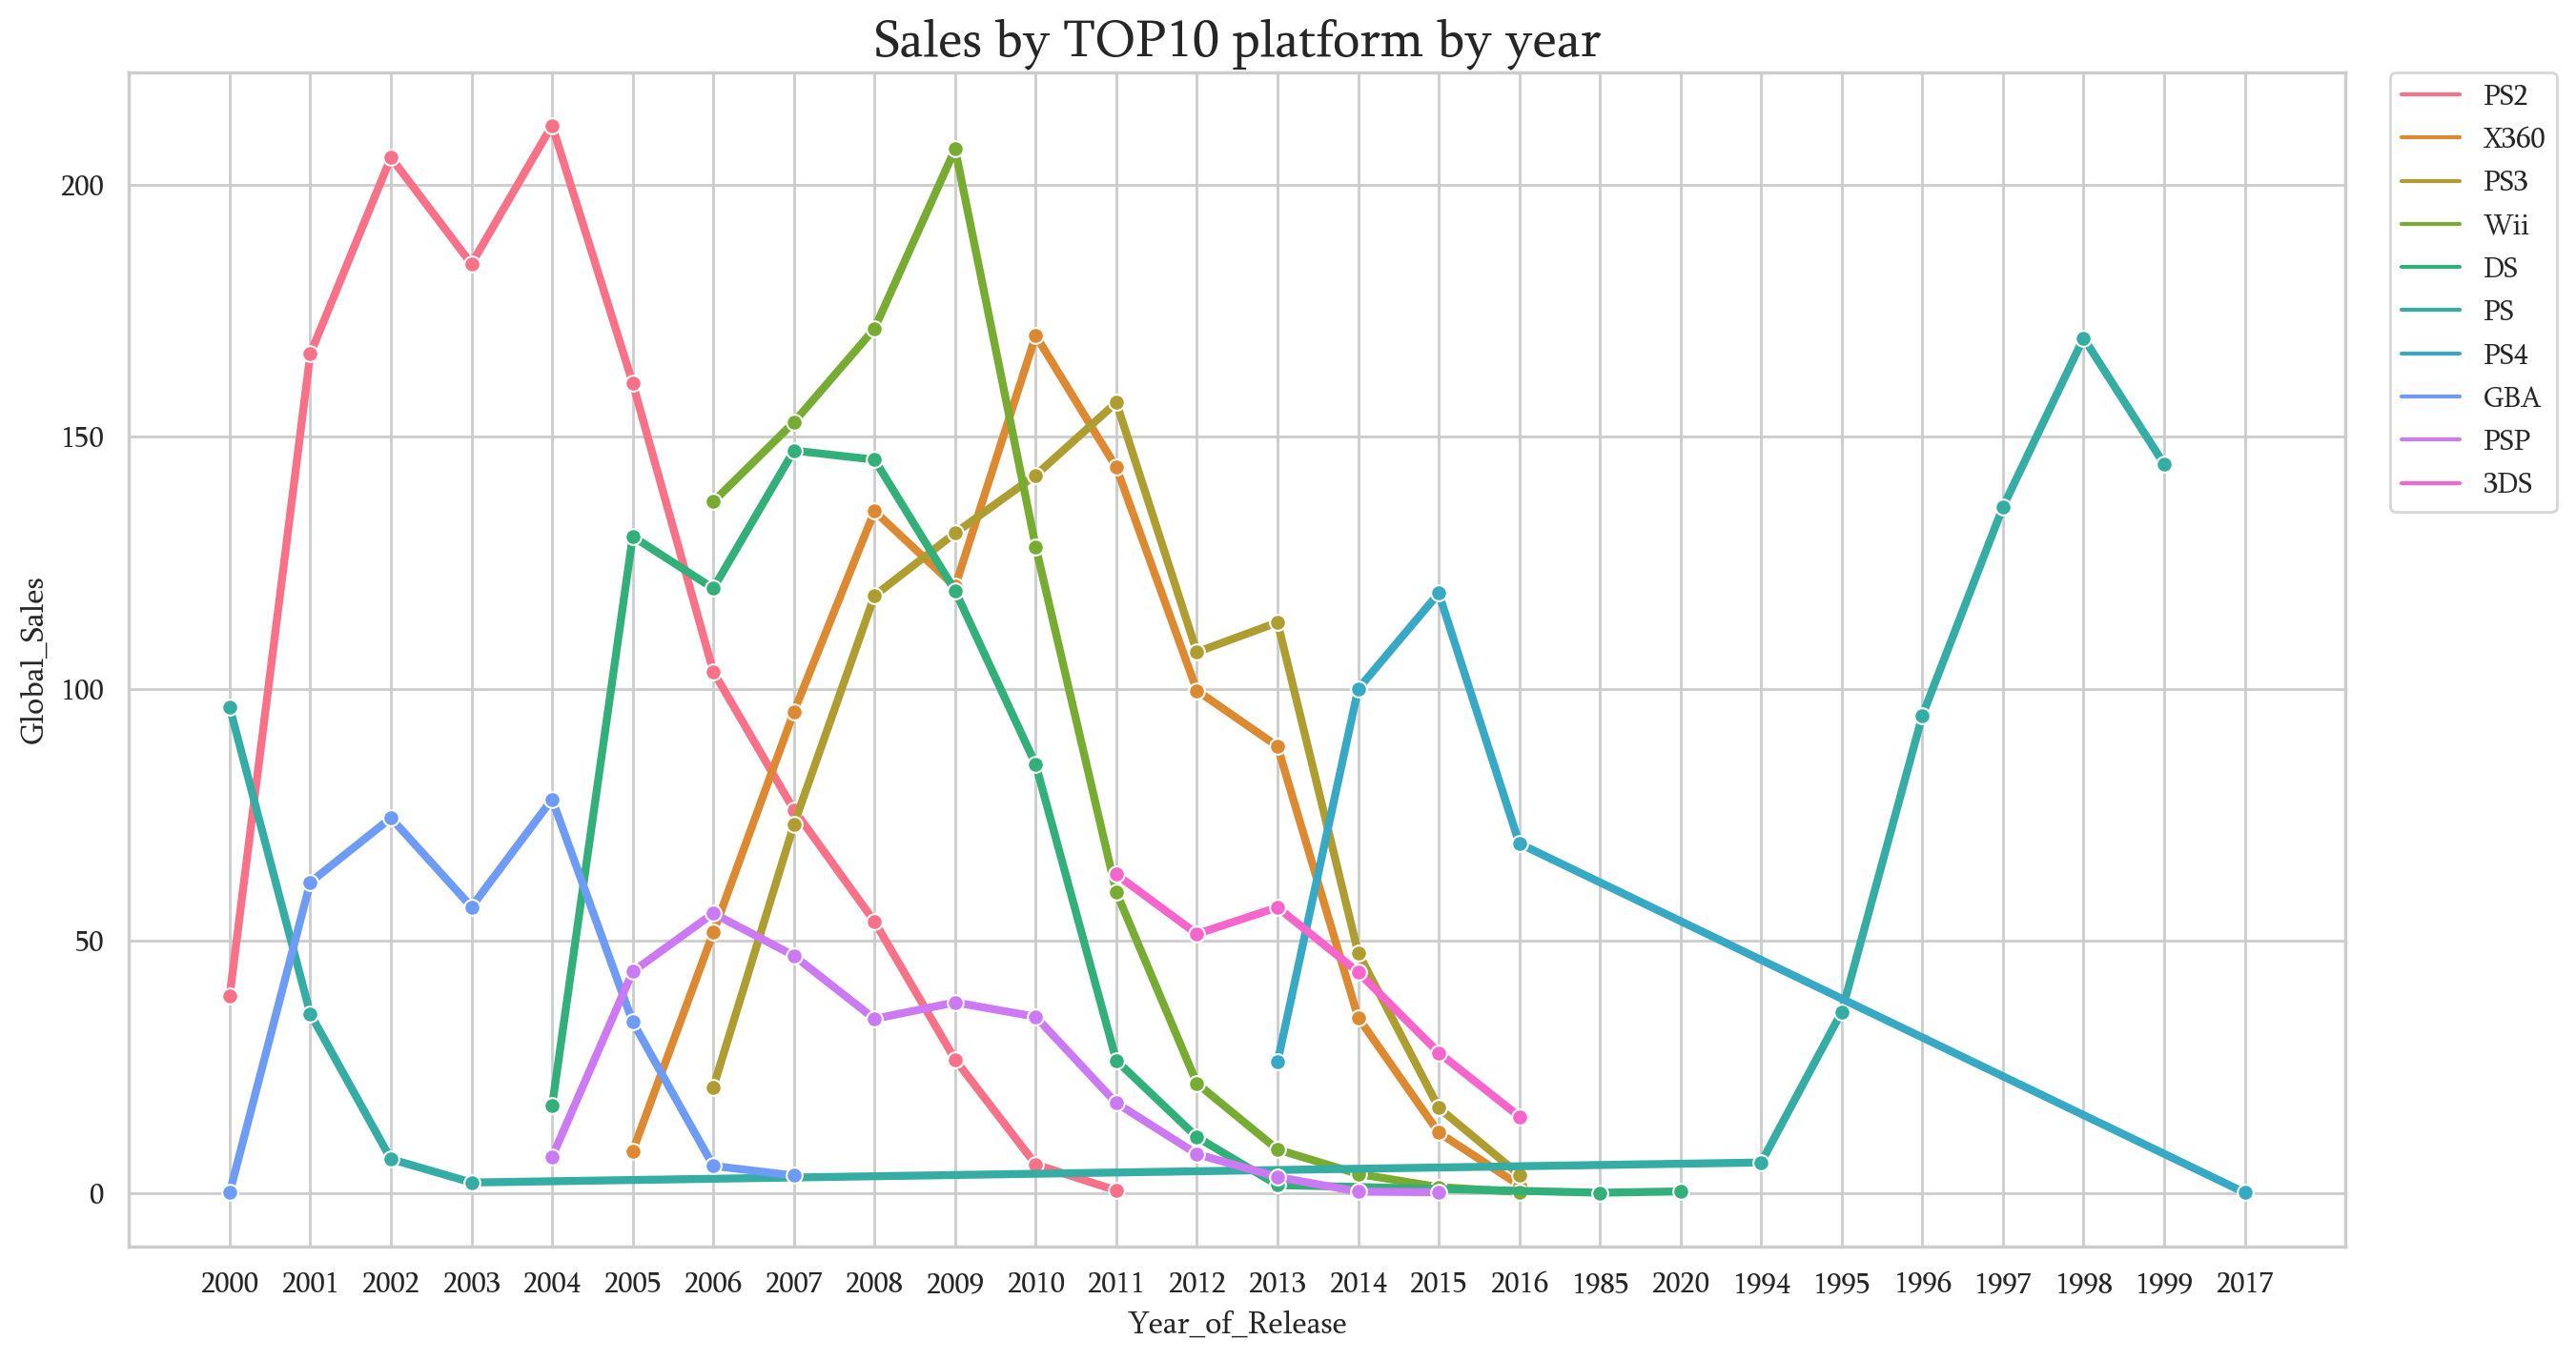

In [102]:
# 연도에 따른 탑10 플랫폼별 판매량 그래프 그리기
plt.figure(figsize=(15, 8))

sns.lineplot(data=df_platform_top10, x="Year_of_Release", y="Global_Sales", hue="Platform", marker='o', linewidth=3)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Sales by TOP10 platform by year', fontsize=20)


In [97]:
# 판매량이 가장 높은 15개의 플랫폼 리스트 만들기.

df_platform = df_year_platform.groupby('Platform')['Global_Sales'].sum().to_frame()
df_platform = df_platform.sort_values(by='Global_Sales', ascending=False).head(15)
df_platform = df_platform.reset_index()
platform_list = df_platform['Platform'].array

# 판매량이 가장 높은 15개의 플랫폼의 정보를 df_platform_top10에 담기.
df_platform_top15 = pd.DataFrame()

for i in range(len(platform_list)):
    df_p = df_year_platform[df_year_platform['Platform']==platform_list[i]]
    df_platform_top15 = df_platform_top10.append(df_p)
    
df_platform_top15.head()

,Year_of_Release,Platform,Global_Sales
94,2000,PS2,39.11
104,2001,PS2,166.43
113,2002,PS2,205.40
119,2003,PS2,184.29
125,2004,PS2,211.78


Text(0.5, 1.0, 'Sales by TOP15 platform by year')

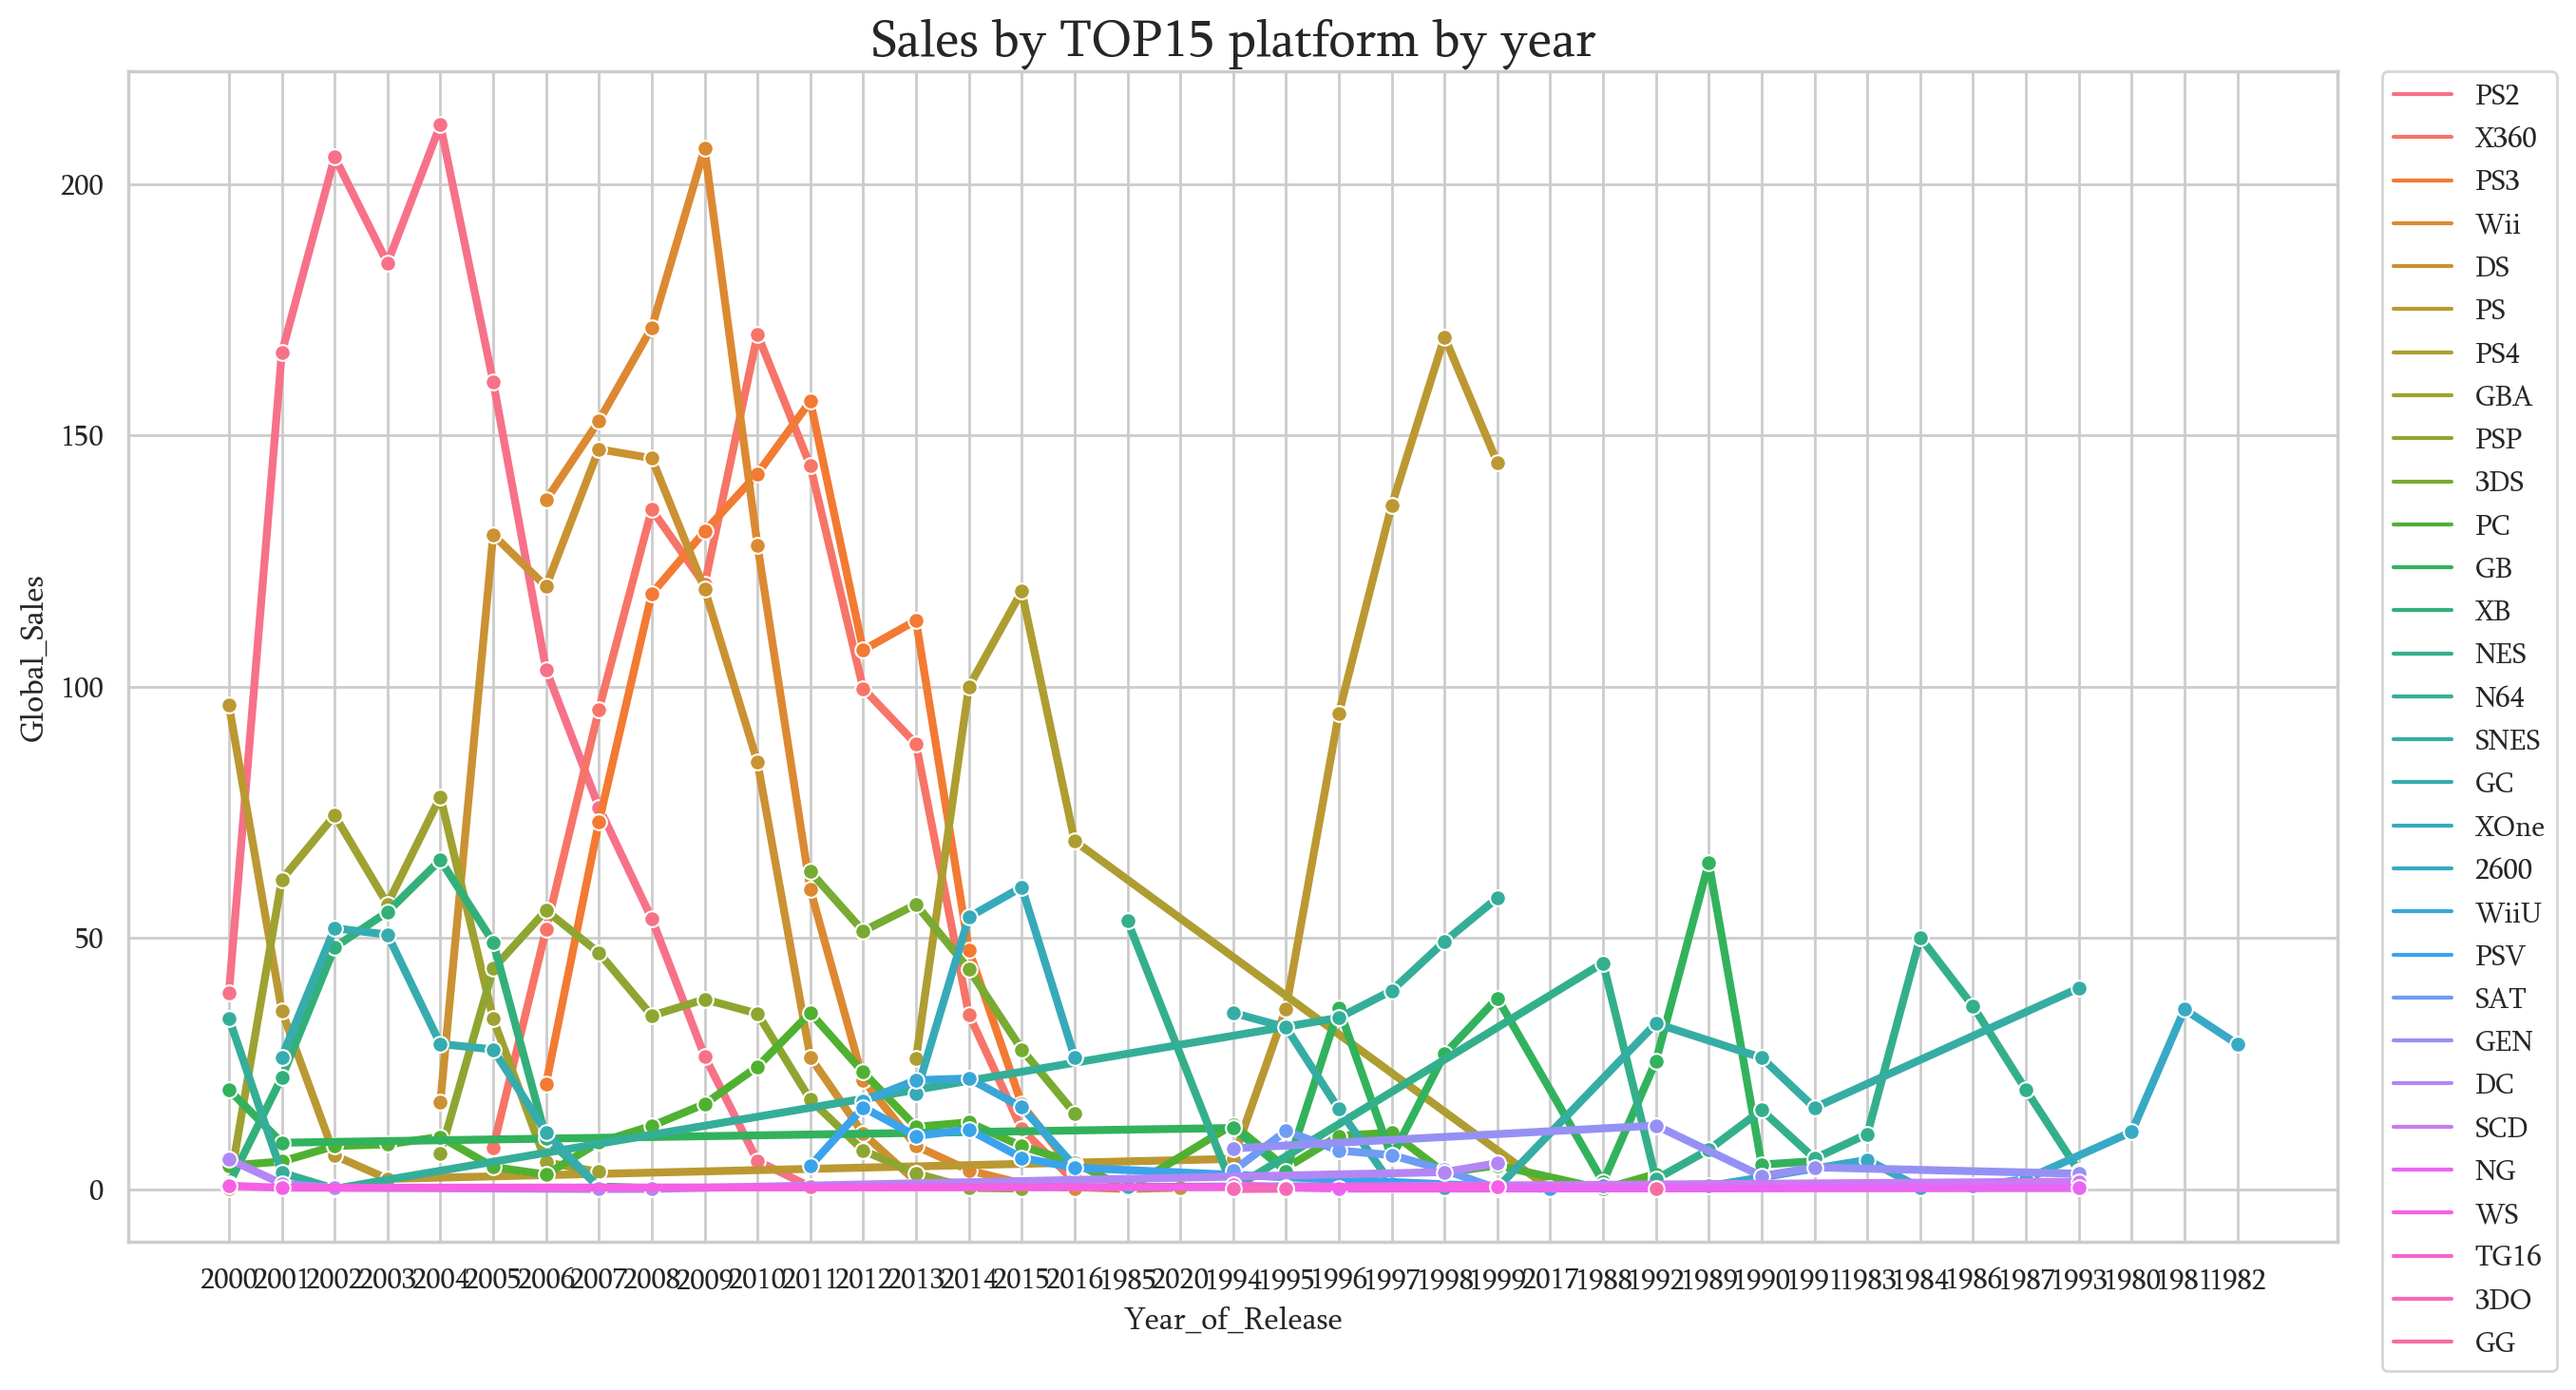

In [98]:
# 연도에 따른 탑10 플랫폼별 판매량 그래프 그리기
plt.figure(figsize=(15, 8))

sns.lineplot(data=df_platform_top15, x="Year_of_Release", y="Global_Sales", hue="Platform", marker='o', linewidth=3)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Sales by TOP15 platform by year', fontsize=20)

In [103]:
# 시대별 게임장르 트렌드
df_period = df.groupby(['Year_of_Release', 'Genre'])['Genre'].count().unstack()
df_period = df_period.fillna(0)
df_period.head()

Genre,Action,Adventure,Fighting,Idea Factory,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sony Computer Entertainment,Sports,Strategy
Year_of_Release,,,,,,,,,,,,,,
1980,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
1981,25.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,10.0,1.0,0.0,4.0,0.0
1982,18.0,0.0,0.0,0.0,1.0,5.0,3.0,2.0,0.0,5.0,0.0,0.0,2.0,0.0
1983,7.0,1.0,0.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1984,1.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0,0.0,2.0,0.0


In [104]:
df_period.columns

Index(['Action', 'Adventure', 'Fighting', 'Idea Factory', 'Misc', 'Platform',
       'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation',
       'Sony Computer Entertainment', 'Sports', 'Strategy'],
      dtype='object', name='Genre')

In [110]:
df_genre_period = df_period.unstack().reset_index()
df_genre_period.columns = ['Genre', 'Year_of_Release', 'Global_Sales']
df_genre_period.head()

,Genre,Year_of_Release,Global_Sales
0,Action,1980,1.0
1,Action,1981,25.0
2,Action,1982,18.0
3,Action,1983,7.0
4,Action,1984,1.0


In [ ]:
df_period.loc['1980-1989', :] = df_period.loc[[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0]].sum()
df_period.loc['1990-1999', :] = df_period.loc[[1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0]].sum()
df_period.loc['2000-2009', :]= df_period.loc[[2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0]].sum()
df_period.loc['2010-2016', :] = df_period.loc[[2010.0, 2011, 2012, 2013, 2014, 2015, 2016,2017]].sum()

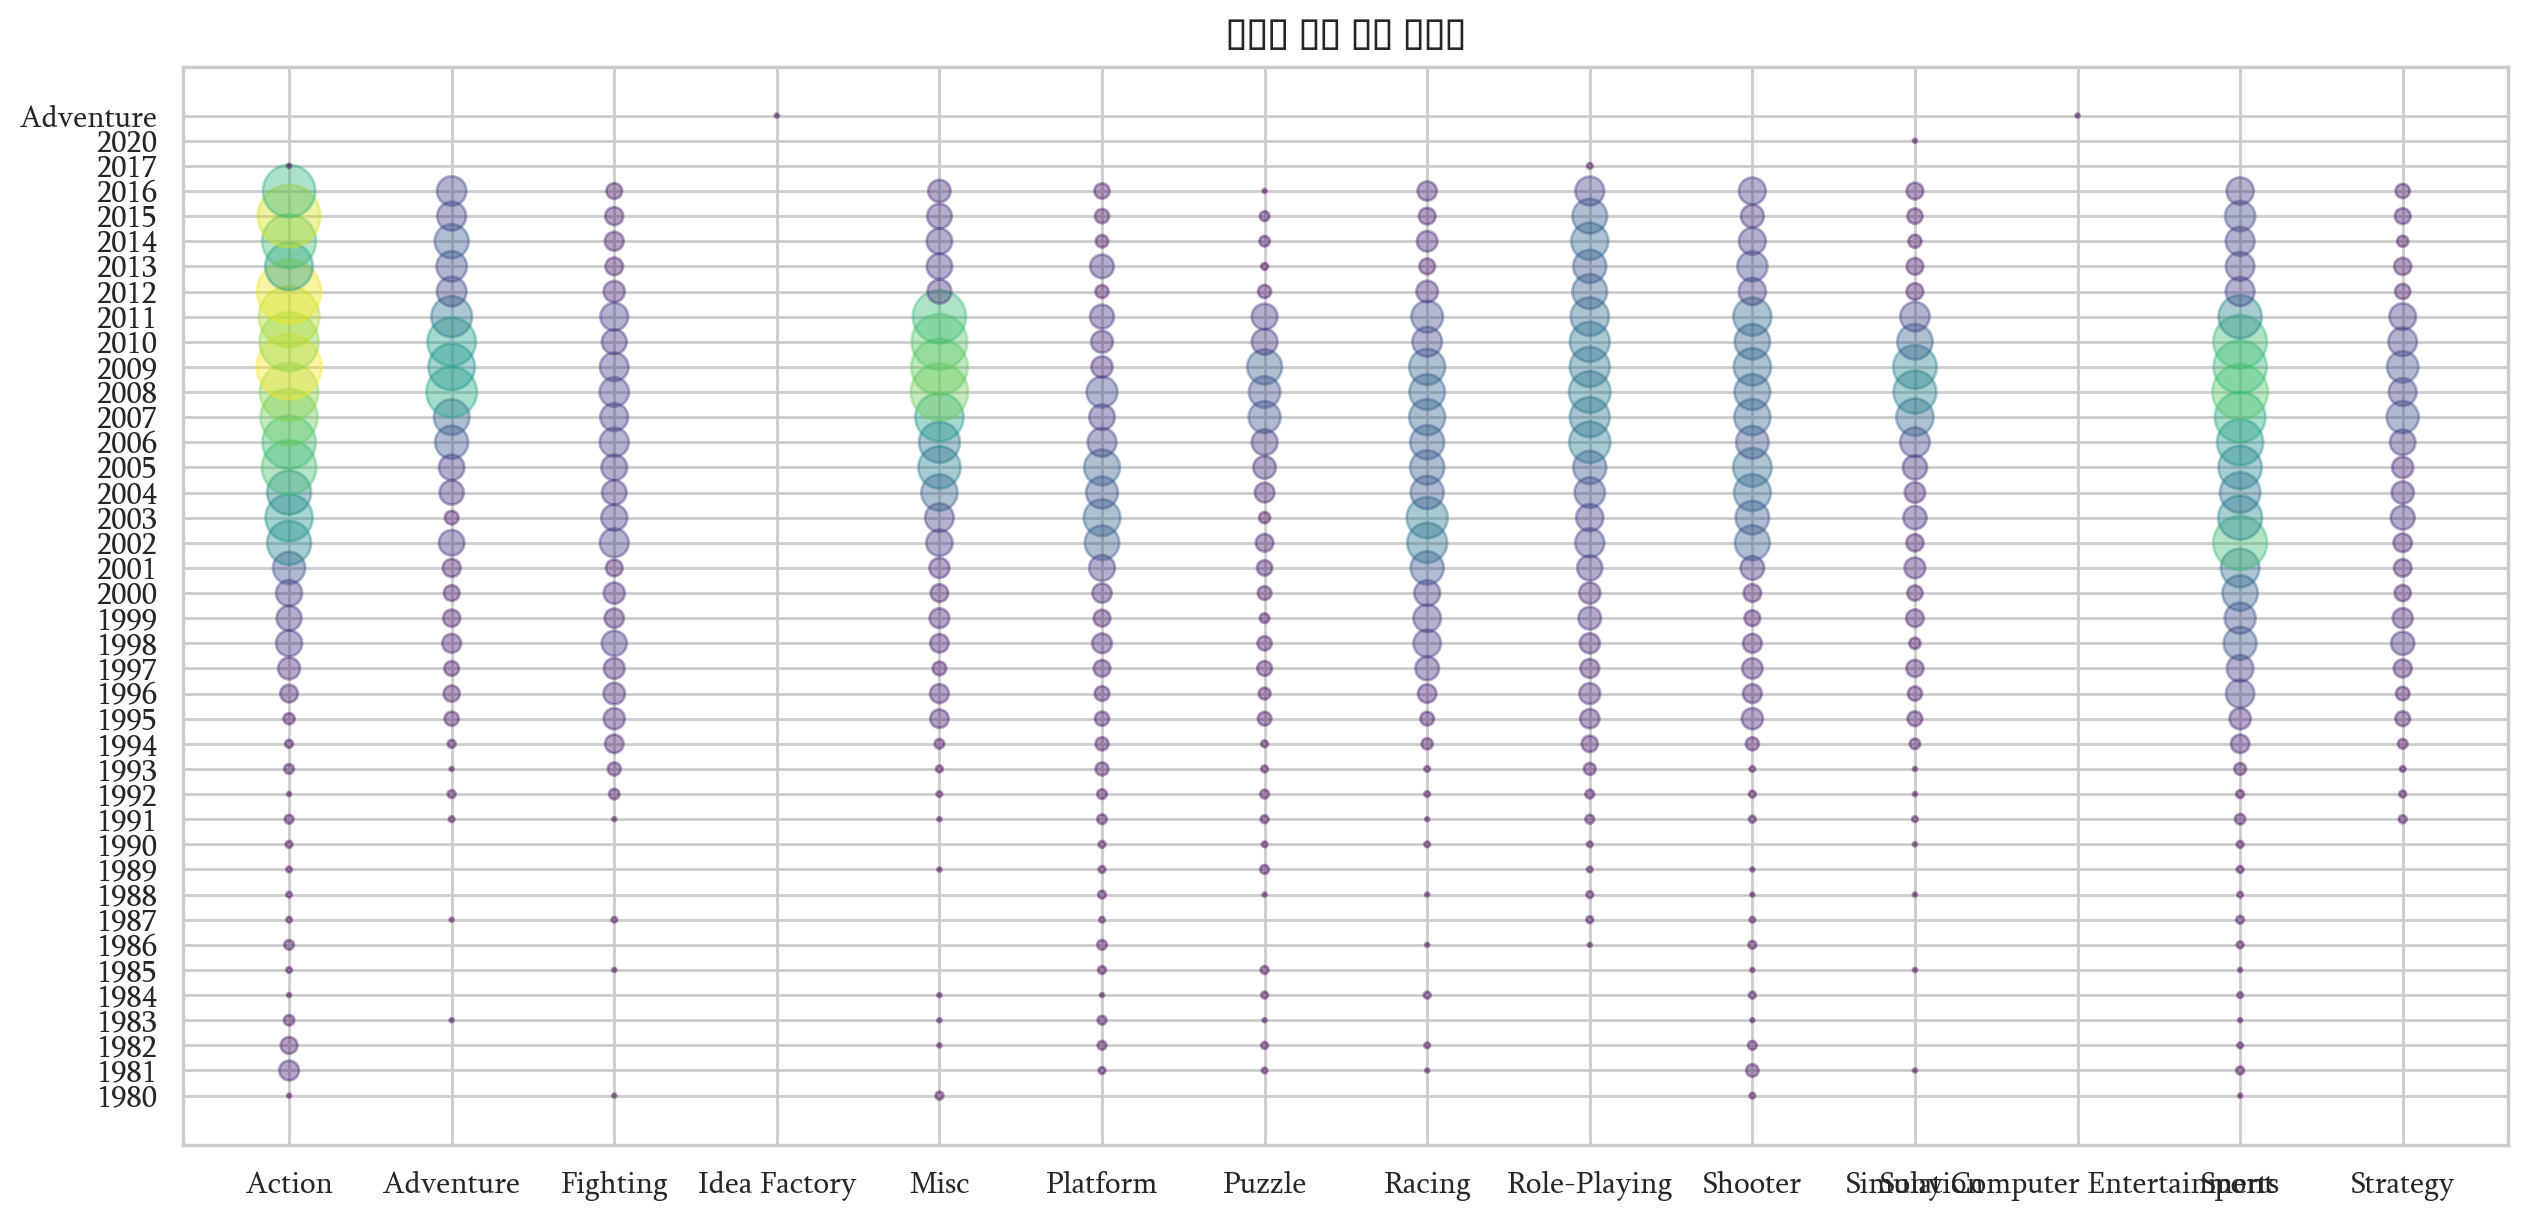

In [112]:
plt.figure(figsize=(15, 7))
plt.title('Trends in game genres by Era', fontsize=15)
plt.scatter(df_genre_period['Genre'], df_genre_period['Year_of_Release'], alpha=0.4, 
            s=df_genre_period['Global_Sales']*2, c=df_genre_period['Global_Sales'], cmap='viridis')
plt.show()